In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import collections as co

In [2]:
data = pd.read_csv("WHO-COVID-19-global-data.csv")

In [3]:
set_Country = set(data["Country"])
list_Country = list(set_Country)
list_data = data.values.tolist() #整個轉為list
print(list_Country)

['Canada', 'Jersey', 'Australia', 'Eritrea', 'Italy', 'Côte d’Ivoire', 'Gambia', 'Bhutan', 'Denmark', 'Eswatini', 'Angola', 'Azerbaijan', 'Honduras', 'Saint Lucia', 'Vanuatu', 'Kenya', 'Argentina', 'Holy See', 'Israel', 'Mexico', 'Serbia', 'Chad', 'Samoa', 'Afghanistan', 'Kosovo[1]', 'Costa Rica', 'Mozambique', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Fiji', 'Guyana', 'Saba', 'Northern Mariana Islands (Commonwealth of the)', 'Benin', 'Democratic Republic of the Congo', 'Turkmenistan', 'Guinea-Bissau', 'Dominican Republic', 'Cyprus', 'Tuvalu', 'Cambodia', 'Pakistan', 'Lithuania', 'Cayman Islands', 'San Marino', 'China', 'Spain', 'Paraguay', 'Kazakhstan', 'Panama', 'Equatorial Guinea', 'Djibouti', 'Senegal', 'Trinidad and Tobago', 'Syrian Arab Republic', 'Marshall Islands', 'Turks and Caicos Islands', 'Burkina Faso', 'Palau', 'Anguilla', 'Russian Federation', 'Romania', 'Montserrat', 'Liberia', 'Nepal', 'Papua New Guinea', 'El Salvador', 'Sao Tome and Principe', 'Iceland

In [4]:
for i in list_Country:
    locals()[str(i) + "_data"] = []
    for j in range(0, len(list_data)):
        if(list_data[j][1] == i):
            locals()[str(i) + "_data"].append([[list_data[j][0]], list_data[j][2:6]])
        
        else:
            pass

In [5]:
print(locals()[str("Afghanistan") + "_data"])
print(locals()[str("Afghanistan") + "_data"][0])
print(locals()[str("Afghanistan") + "_data"][0][0])
print(locals()[str("Afghanistan") + "_data"][0][1])

[[['2020/1/3'], [0, 0, 0, 0]], [['2020/1/4'], [0, 0, 0, 0]], [['2020/1/5'], [0, 0, 0, 0]], [['2020/1/6'], [0, 0, 0, 0]], [['2020/1/7'], [0, 0, 0, 0]], [['2020/1/8'], [0, 0, 0, 0]], [['2020/1/9'], [0, 0, 0, 0]], [['2020/1/10'], [0, 0, 0, 0]], [['2020/1/11'], [0, 0, 0, 0]], [['2020/1/12'], [0, 0, 0, 0]], [['2020/1/13'], [0, 0, 0, 0]], [['2020/1/14'], [0, 0, 0, 0]], [['2020/1/15'], [0, 0, 0, 0]], [['2020/1/16'], [0, 0, 0, 0]], [['2020/1/17'], [0, 0, 0, 0]], [['2020/1/18'], [0, 0, 0, 0]], [['2020/1/19'], [0, 0, 0, 0]], [['2020/1/20'], [0, 0, 0, 0]], [['2020/1/21'], [0, 0, 0, 0]], [['2020/1/22'], [0, 0, 0, 0]], [['2020/1/23'], [0, 0, 0, 0]], [['2020/1/24'], [0, 0, 0, 0]], [['2020/1/25'], [0, 0, 0, 0]], [['2020/1/26'], [0, 0, 0, 0]], [['2020/1/27'], [0, 0, 0, 0]], [['2020/1/28'], [0, 0, 0, 0]], [['2020/1/29'], [0, 0, 0, 0]], [['2020/1/30'], [0, 0, 0, 0]], [['2020/1/31'], [0, 0, 0, 0]], [['2020/2/1'], [0, 0, 0, 0]], [['2020/2/2'], [0, 0, 0, 0]], [['2020/2/3'], [0, 0, 0, 0]], [['2020/2/4'], [0

In [6]:
for j in list_Country:

    locals()[str("{}".format(j)) + "_time"] = []
    locals()[str("{}".format(j)) + "_New_cases"] = []
    locals()[str("{}".format(j)) + "_Cumulative_cases"] = []
    locals()[str("{}".format(j)) + "_New_deaths"] = []
    locals()[str("{}".format(j)) + "_Cumulative_deaths"] = []

    for i in range( 0, len(locals()[str("{}".format(j)) + "_data"]) ):
        locals()[str("{}".format(j)) + "_time"].append(locals()[str("{}".format(j)) + "_data"][i][0][0])
        locals()[str("{}".format(j)) + "_New_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][0])
        locals()[str("{}".format(j)) + "_Cumulative_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][1])
        locals()[str("{}".format(j)) + "_New_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][2])
        locals()[str("{}".format(j)) + "_Cumulative_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][3])

## 全球累計確診人口

### 世界全部

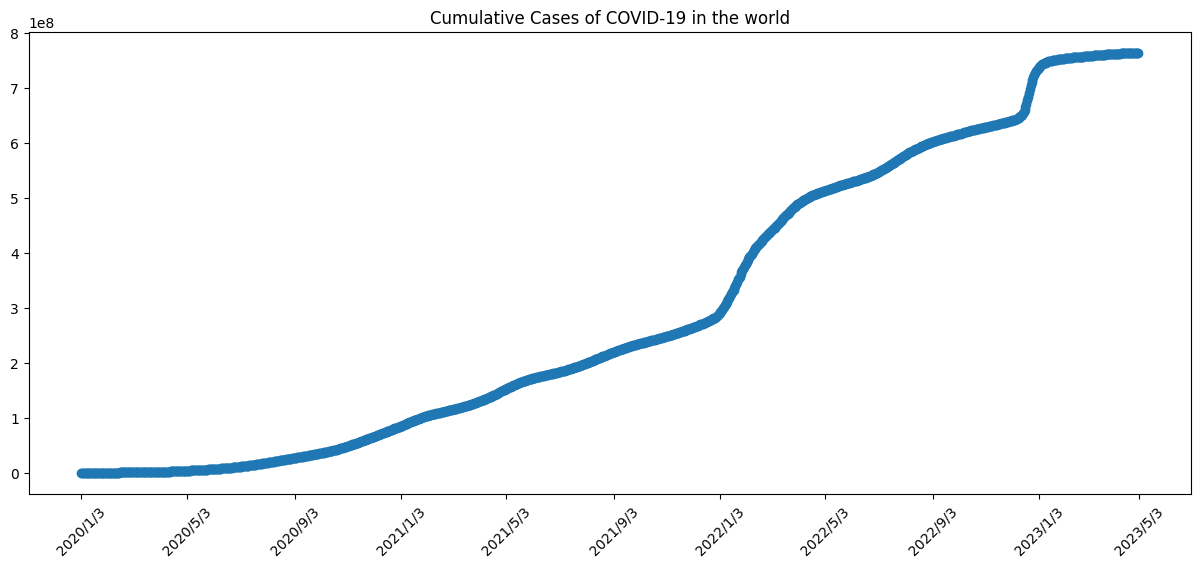

In [7]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_Cumulative_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

plt.figure(figsize = (15, 6))
plt.title("Cumulative Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)
plt.show()

### 各國總確診人數 Zip's Law (國家排名對確診人數的 Zip's Law)

C:\Users\Surface\AppData\Local\Temp\ipykernel_7904\3521433122.py:16: RuntimeWarning: divide by zero encountered in log10
  log_count.append(np.log10(count[j]))


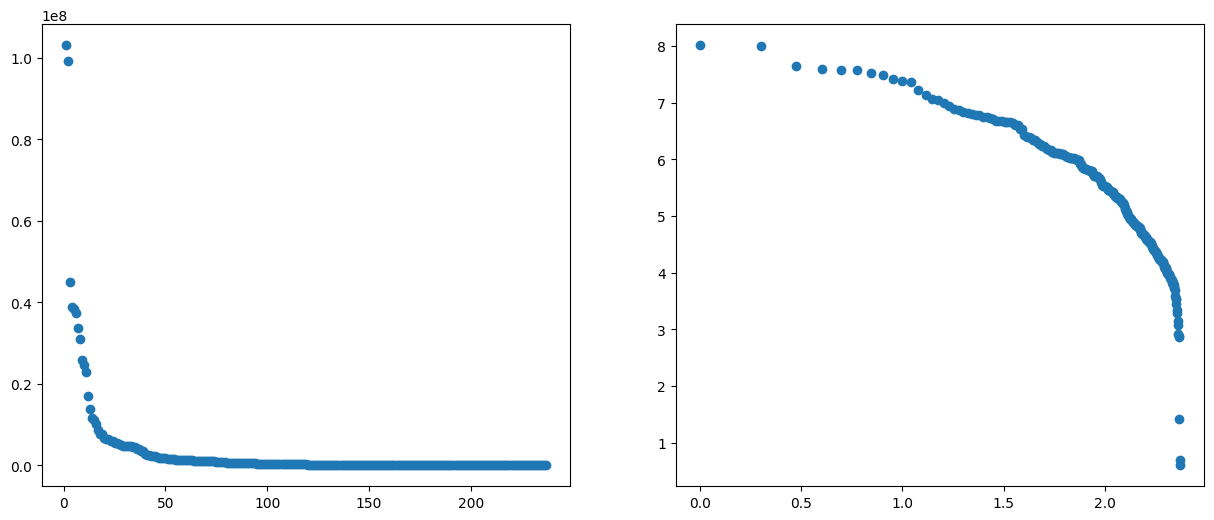

In [18]:
country_total = []
for i in list_Country:
    country_total.append(locals()[str("{}".format(i)) + "_Cumulative_cases"][-1])

# count = []
# cate = list(set(country_total))
# for i in range(0, len(cate)):
#     count.append(co.Counter(country_total)[cate[i]])
# count = sorted(count, reverse = True) #由大到小排列
count = sorted(country_total, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.scatter(x, count)
plt.subplot(122)
plt.scatter(log_x, log_count)
plt.show()

## 全球的新增人口

### 新增人口 Zip's law (新增人口排名對新增人口的 Zip's law)

[0, 3, 0, 3, 0, 0, 1, 0, 1, 42, 1, 6, 0, 0, 1, 4, 77, 79, 93, 148, 131, 275, 473, 697, 790, 1775, 1489, 1756, 2013, 2112, 2605, 2836, 3255, 3948, 3728, 3197, 3408, 2668, 3059, 2484, 2074, 15204, 4076, 2726, 2107, 2158, 1998, 1885, 427, 1034, 1064, 1032, 529, 839, 861, 1083, 1374, 1773, 1795, 1664, 2327, 2989, 2520, 3641, 3711, 3699, 3931, 5158, 5812, 8283, 10097, 12059, 13210, 12860, 16635, 19599, 24079, 28847, 32847, 35972, 33680, 41080, 47633, 51443, 60492, 67033, 66651, 58245, 64251, 67913, 73554, 77084, 80950, 77758, 71042, 67601, 76723, 80100, 87231, 87652, 82783, 73221, 66465, 70650, 74974, 79285, 83526, 82058, 72413, 71672, 75372, 75628, 81224, 97083, 83210, 79703, 69642, 71000, 77210, 81988, 88764, 87832, 79201, 79470, 78206, 82884, 89653, 91595, 92182, 86562, 72652, 81582, 86054, 86693, 102751, 98701, 96730, 80034, 93592, 105057, 106508, 108077, 107039, 96815, 93147, 89783, 100460, 108870, 120071, 121473, 127180, 109952, 99354, 125124, 126632, 127436, 132349, 125256, 109495, 1

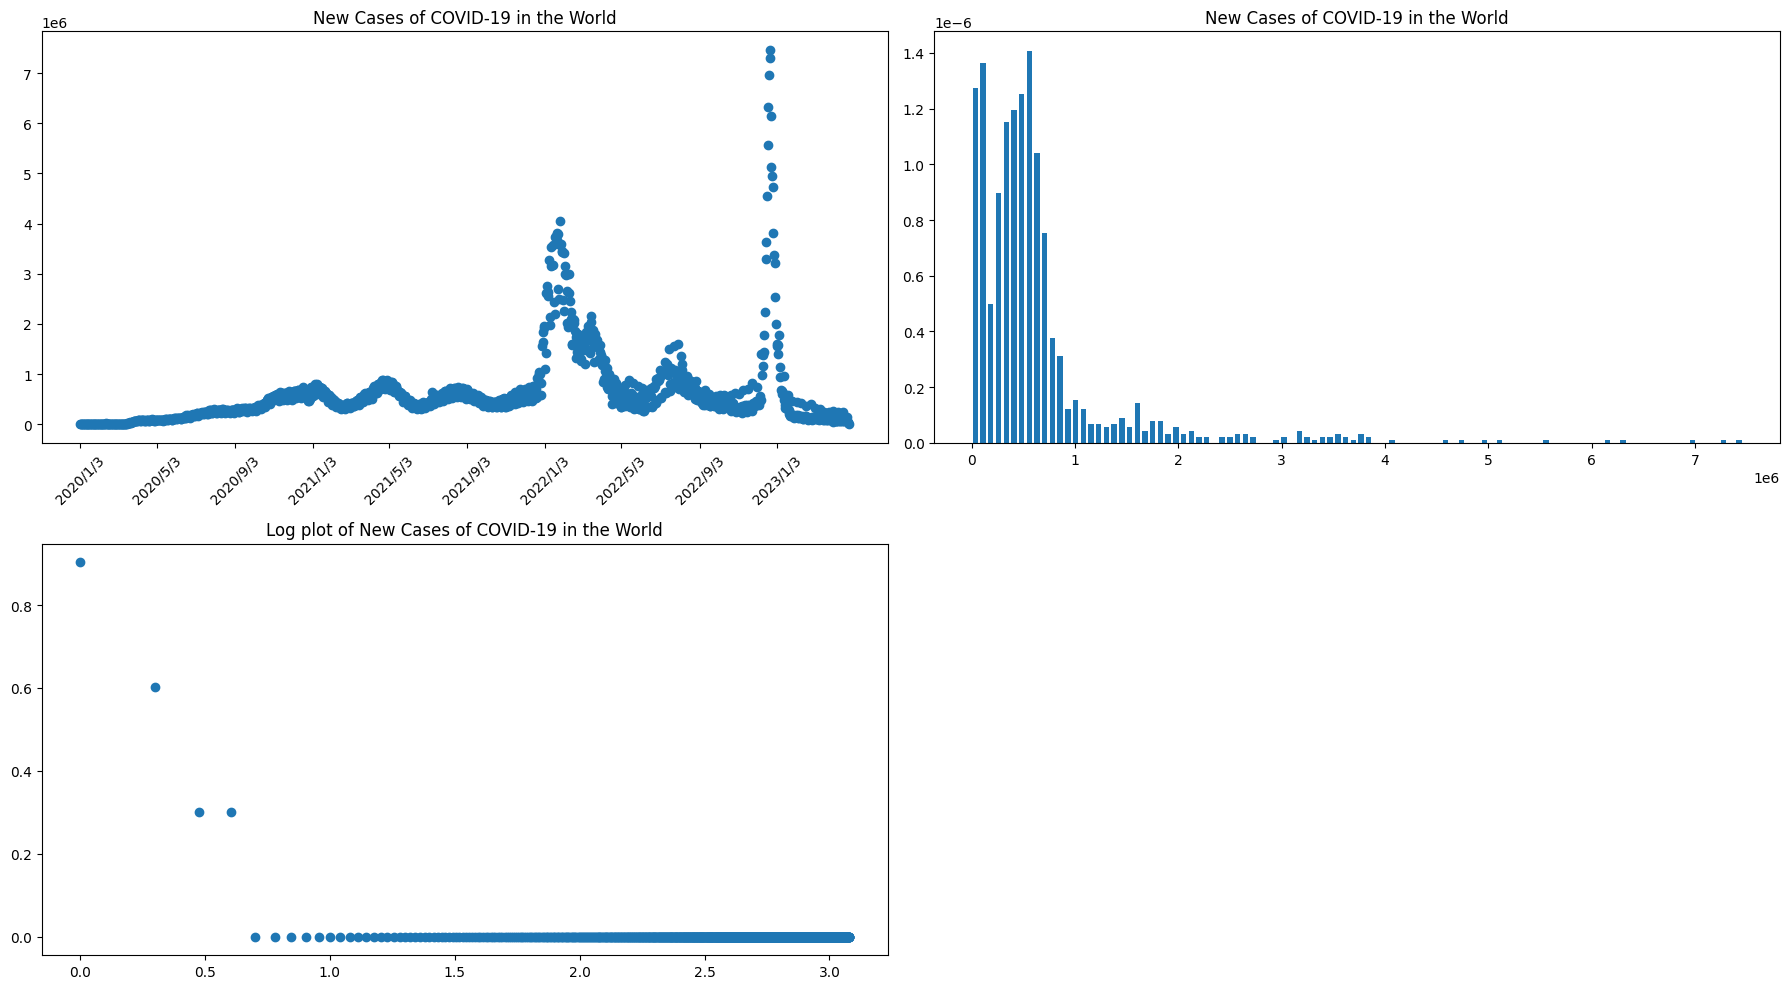

In [8]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)
    
print(total_cases)
time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

total_cases_rate = total_cases


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]
plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases of COVID-19 in the World")
plt.scatter(time, total_cases_rate)
plt.xticks(rang, rotation = 45)

######################################################################

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))


log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

plt.subplot(222)
plt.hist(total_cases_rate, bins = 100, density = True, rwidth = 0.7)
plt.title("New Cases of COVID-19 in the World")

####################################################################

plt.subplot(223)
plt.title("Log plot of New Cases of COVID-19 in the World")
plt.scatter(log_x, log_count)

plt.tight_layout()


### 新增人口 DFA

<Figure size 800x600 with 0 Axes>

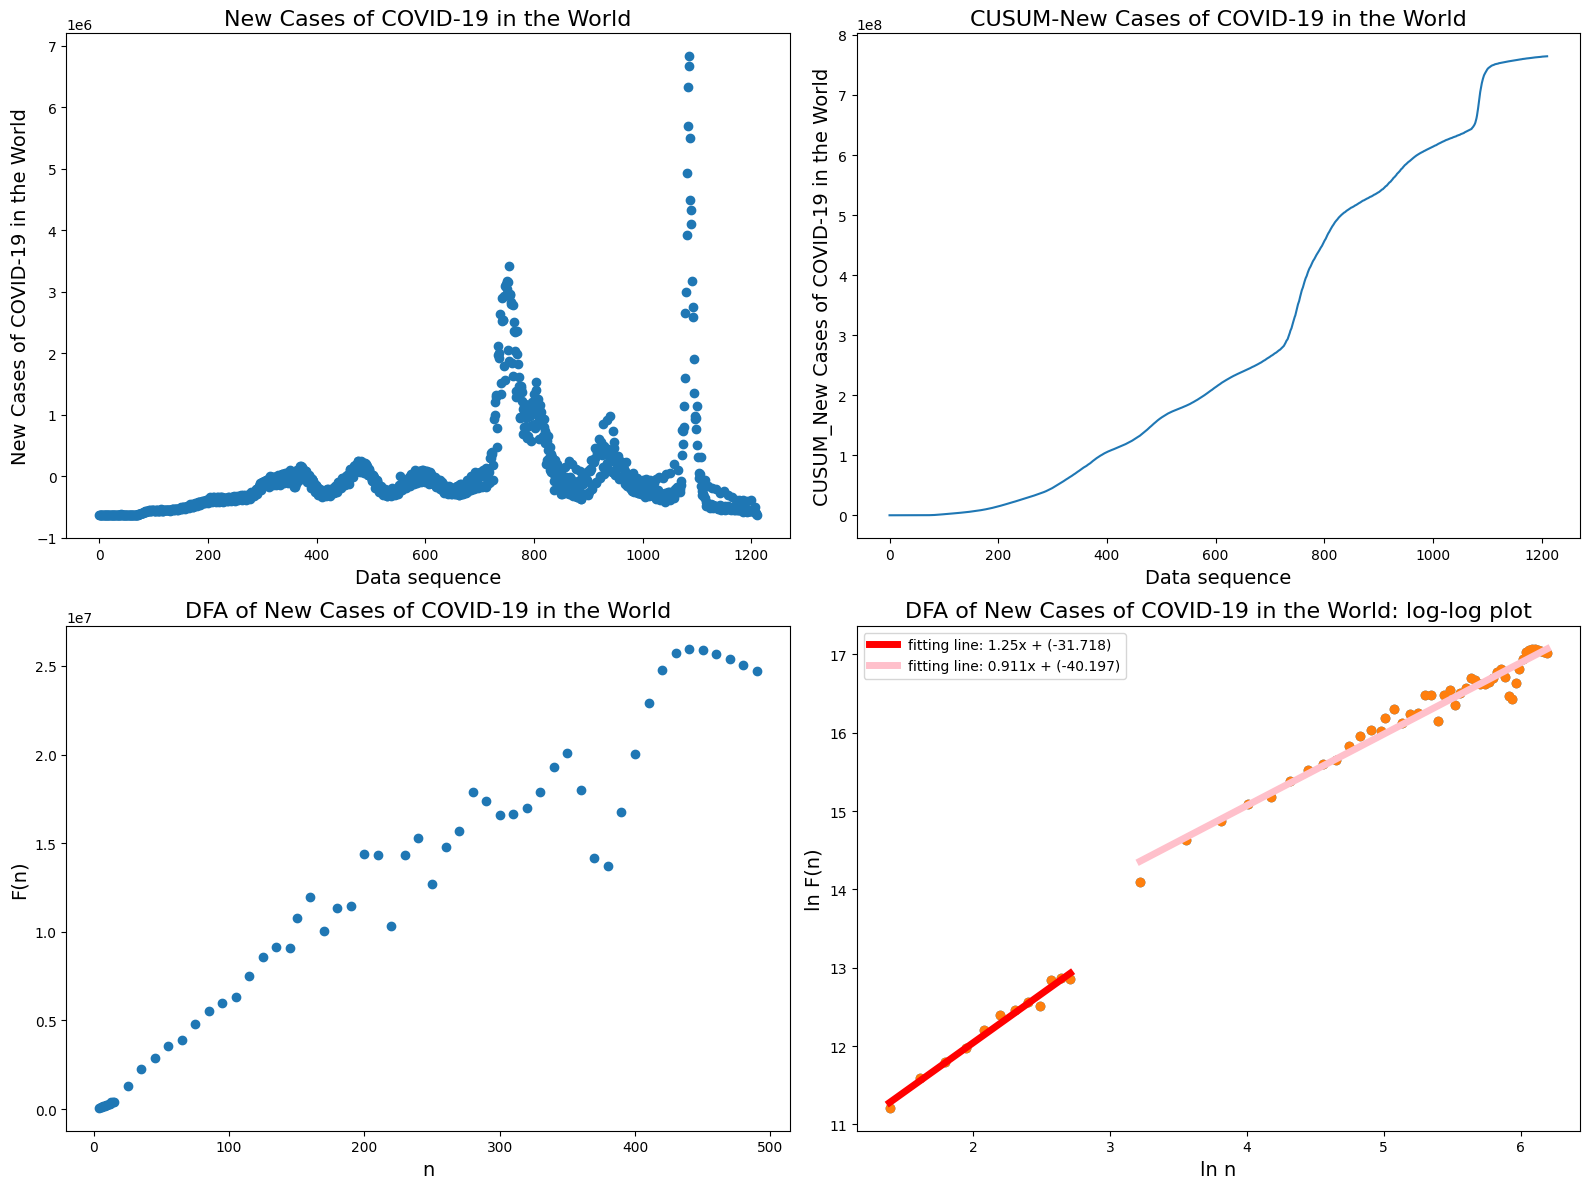

In [9]:
raw_data_y = total_cases_rate
raw_data_x = np.linspace(0, len(total_cases_rate), len(total_cases_rate))

size = []
for i in range(4, 15, 1):
    size.append(i)

for i in range(15, 150, 10):
    size.append(i)

for i in range(150, 500, 10):
    size.append(i)

def line_function(x, a, b):
    return a*x + b

# mean-centered cumulative sum

ave = [np.mean(raw_data_y)]*len(raw_data_y)
CUM = np.array(raw_data_y) - np.array(ave)

CUSUM = np.cumsum(raw_data_y)
####################################################################
def lin_function(x, a, b):
    return a*(x) + b

Fn_array = []
boundary = len(CUSUM)

for i in size:
    Fn_power = []
    for j in range(0, boundary, i-1):
        div_y = CUSUM[j:j+i]
        div_x = raw_data_x[j:j+i]

        if (len(div_y) < 3):
            break
        
        else:
            x0 = div_x
            y0 = div_y
            # print(type((div_y[-1] - div_y[0])), (div_y[-1] - div_y[0]))
            # print(type(div_x[-1]))
            fitt=( (div_y[-1] - div_y[0])/(div_x[-1] - div_x[0]), div_y[0])
            popt,pcov= curve_fit(lin_function, x0, y0, p0=fitt)

            for k in range(len(x0)):
                value = ( y0[k] - lin_function(x0[k], *popt) )**2
                Fn_power.append(value)
    
    Fn = np.sqrt( np.mean(Fn_power) )
    Fn_array.append(Fn)
######################################################################
log_Fn_array = []
log_size = []
for i in range(len(size)):
    log_size.append(np.log(size[i]))
    log_Fn_array.append(np.log(Fn_array[i]))

plt.figure(figsize = (8, 6))


######################################################################
plt.figure(figsize = (16, 12))
plt.subplot(221)
plt.title("New Cases of COVID-19 in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("New Cases of COVID-19 in the World", fontsize = 14)
plt.scatter(raw_data_x, CUM)

plt.subplot(222)
plt.title("CUSUM-New Cases of COVID-19 in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("CUSUM_New Cases of COVID-19 in the World", fontsize = 14)
plt.plot(raw_data_x, CUSUM)

plt.subplot(223)
plt.title("DFA of New Cases of COVID-19 in the World", fontsize = 16)
plt.xlabel('n', fontsize = 14)
plt.ylabel('F(n)', fontsize = 14)
plt.scatter(size, Fn_array)

plt.subplot(224)
plt.title("DFA of New Cases of COVID-19 in the World: log-log plot", fontsize = 16)
def lin_function_2(x, a, b, c):
    return a*(x + b) + c

x0 = log_size[0:12]
y0 = log_Fn_array[0:12]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.scatter(log_size, log_Fn_array)
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="red", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

x0 = log_size[12:]
y0 = log_Fn_array[12:]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.scatter(log_size, log_Fn_array)
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="pink", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

plt.xlabel('ln n', fontsize = 14)
plt.ylabel('ln F(n)', fontsize = 14)
plt.legend(loc = 'best')
plt.tight_layout()
# plt.savefig('DFA of New Cases of COVID-19 in the World_2 fitting.png')
plt.show()

## 全球新增人口比率

### 新增人口比率 Zip's law

['2020/4/12', '2020/4/13', '2020/4/14', '2020/4/15', '2020/4/16', '2020/4/17', '2020/4/18', '2020/4/19', '2020/4/20', '2020/4/21', '2020/4/22', '2020/4/23', '2020/4/24', '2020/4/25', '2020/4/26', '2020/4/27', '2020/4/28', '2020/4/29', '2020/4/30', '2020/5/1', '2020/5/2', '2020/5/3', '2020/5/4', '2020/5/5', '2020/5/6', '2020/5/7', '2020/5/8', '2020/5/9', '2020/5/10', '2020/5/11', '2020/5/12', '2020/5/13', '2020/5/14', '2020/5/15', '2020/5/16', '2020/5/17', '2020/5/18', '2020/5/19', '2020/5/20', '2020/5/21', '2020/5/22', '2020/5/23', '2020/5/24', '2020/5/25', '2020/5/26', '2020/5/27', '2020/5/28', '2020/5/29', '2020/5/30', '2020/5/31', '2020/6/1', '2020/6/2', '2020/6/3', '2020/6/4', '2020/6/5', '2020/6/6', '2020/6/7', '2020/6/8', '2020/6/9', '2020/6/10', '2020/6/11', '2020/6/12', '2020/6/13', '2020/6/14', '2020/6/15', '2020/6/16', '2020/6/17', '2020/6/18', '2020/6/19', '2020/6/20', '2020/6/21', '2020/6/22', '2020/6/23', '2020/6/24', '2020/6/25', '2020/6/26', '2020/6/27', '2020/6/28', '20

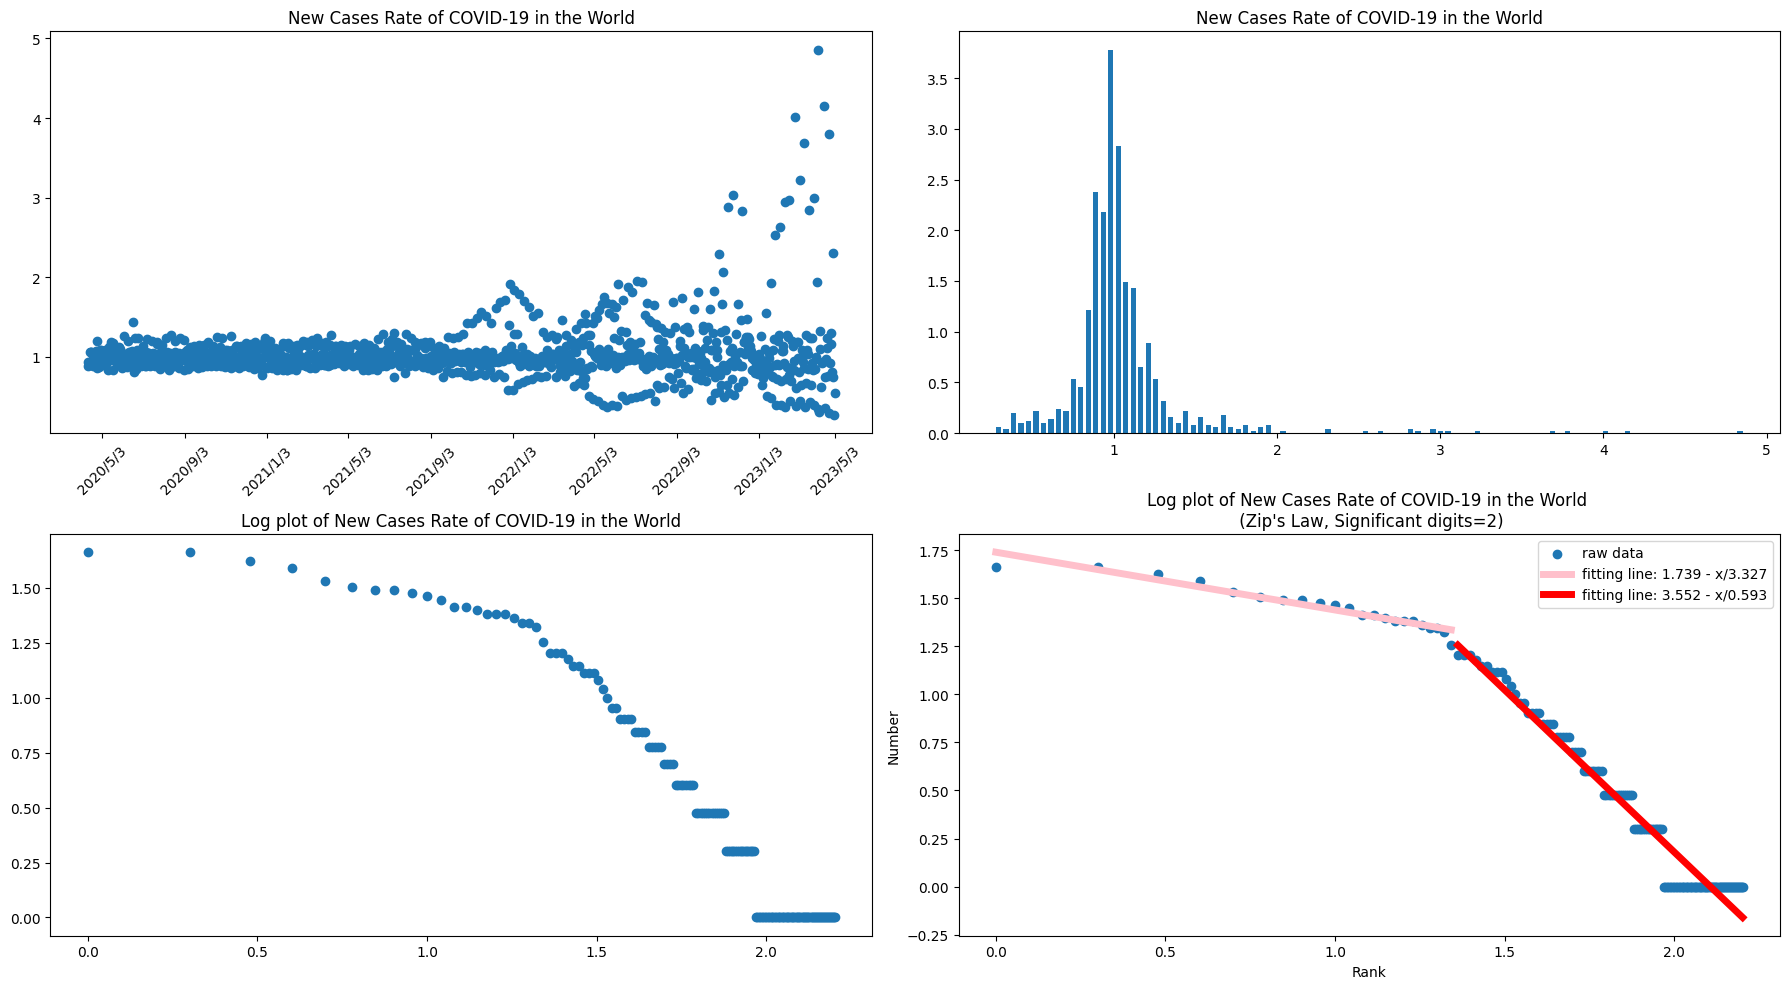

In [10]:
dig = 2

total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

total_cases_rate = []
start = 100
for i in range(start, 1210-1):
    total_cases_rate.append( round(total_cases[i]/total_cases[i-1], dig) )

rang = ["2020/5/3", "2020/9/3",
        "2021/1/3", "2021/5/3", "2021/9/3",
        "2022/1/3", "2022/5/3", "2022/9/3",
        "2023/1/3", "2023/5/3"]

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate of COVID-19 in the World")
plt.scatter(time[ start:(1210-1) ], total_cases_rate)
plt.xticks(rang, rotation = 45)
print(time[ start:(1210-1) ])

######################################################################

# count = pd.value_counts(total_cases_rate)
# count = list(count)

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

# print(count)
# print(total_cases_rate)

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

# log_count.remove(log_count[0])
# log_x.remove(log_x[0])

plt.subplot(222)
plt.hist(total_cases_rate, bins = 100, density = True, rwidth = 0.7)
plt.title("New Cases Rate of COVID-19 in the World")
# plt.xlim(0, 2)

####################################################################

plt.subplot(223)
plt.title("Log plot of New Cases Rate of COVID-19 in the World")
plt.scatter(log_x, log_count)

##########################################################################

# FITTING

plt.subplot(224)

plt.scatter(log_x, log_count, label="raw data")
x0 = log_x[0:22]
y0 = log_count[0:22]
# x0 = log_x
# y0 = log_count

def function(x, c, a):
    return c - x/a
fitt=(1.5, 0.5) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
print(popt)
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.title("Log plot of New Cases Rate of COVID-19 in the World \n (Zip's Law, Significant digits={})".format(dig))
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="pink", 
        label="fitting line: {} - x/{}".format(*popt),
        linewidth = 5)

##

x0 = log_x[22:]
y0 = log_count[22:]

def function(x, c, a):
    return c - x/a
fitt=(1.5, 0.5) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
print(popt)
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.title("Log plot of New Cases Rate of COVID-19 in the World \n (Zip's Law, Significant digits={})".format(dig))
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt),
        linewidth = 5)

plt.xlabel("Rank")
plt.ylabel("Number")
plt.legend(loc = 'upper right')

plt.tight_layout()
# plt.savefig("New Cases Rate of COVID-19 in the World_2 fitting (Zip's Law, digits={}).PNG".format(dig))
plt.show()

### 新增人口比率DFA

<Figure size 800x600 with 0 Axes>

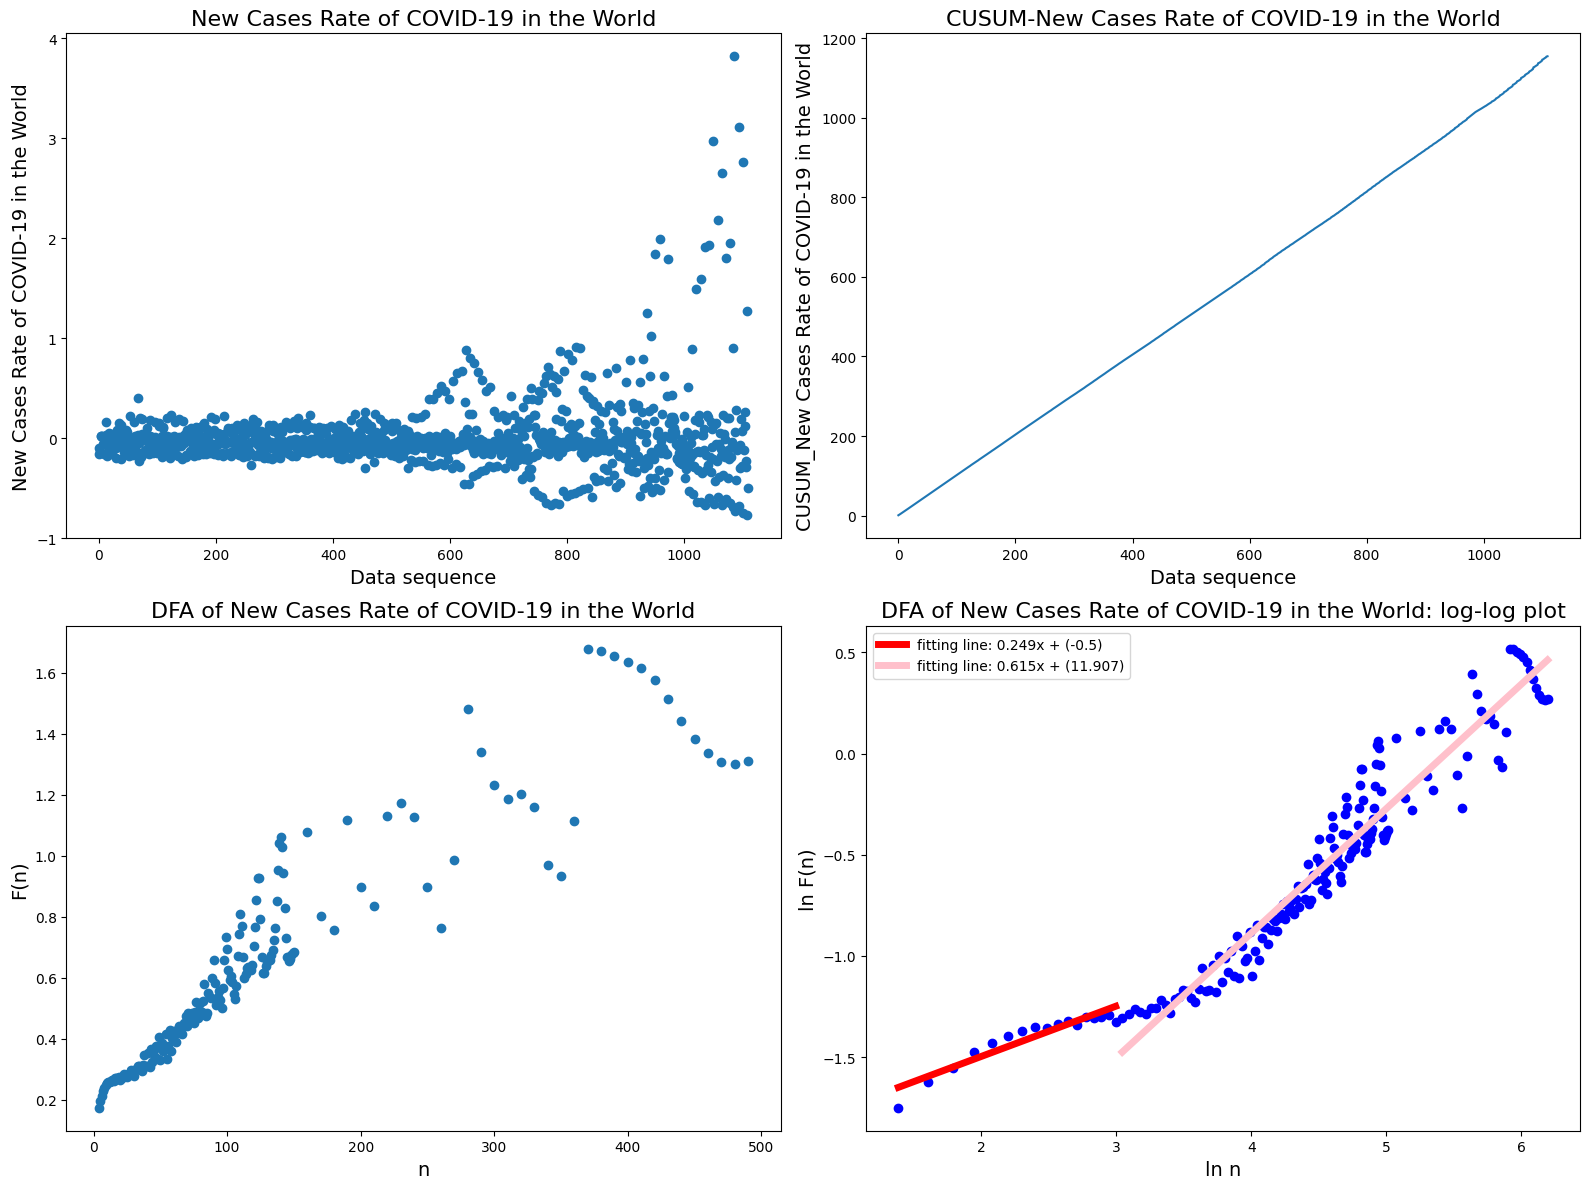

In [15]:
raw_data_y = total_cases_rate
raw_data_x = np.linspace(0, len(total_cases_rate), len(total_cases_rate))

size = []
for i in range(4, 15, 1):
    size.append(i)

for i in range(15, 150, 1):
    size.append(i)

for i in range(150, 500, 10):
    size.append(i)

def line_function(x, a, b):
    return a*x + b

# mean-centered cumulative sum

ave = [np.mean(raw_data_y)]*len(raw_data_y)
CUM = np.array(raw_data_y) - np.array(ave)

CUSUM = np.cumsum(raw_data_y)
####################################################################
def lin_function(x, a, b):
    return a*(x) + b

Fn_array = []
boundary = len(CUSUM)

for i in size:
    Fn_power = []
    for j in range(0, boundary, i-1):
        div_y = CUSUM[j:j+i]
        div_x = raw_data_x[j:j+i]

        if (len(div_y) < 3):
            break
        
        else:
            x0 = div_x
            y0 = div_y
            # print(type((div_y[-1] - div_y[0])), (div_y[-1] - div_y[0]))
            # print(type(div_x[-1]))
            fitt=( (div_y[-1] - div_y[0])/(div_x[-1] - div_x[0]), div_y[0])
            popt,pcov= curve_fit(lin_function, x0, y0, p0=fitt)

            for k in range(len(x0)):
                value = ( y0[k] - lin_function(x0[k], *popt) )**2
                Fn_power.append(value)
    
    Fn = np.sqrt( np.mean(Fn_power) )
    Fn_array.append(Fn)
######################################################################
log_Fn_array = []
log_size = []
for i in range(len(size)):
    log_size.append(np.log(size[i]))
    log_Fn_array.append(np.log(Fn_array[i]))

plt.figure(figsize = (8, 6))


######################################################################
plt.figure(figsize = (16, 12))
plt.subplot(221)
plt.title("New Cases Rate of COVID-19 in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("New Cases Rate of COVID-19 in the World", fontsize = 14)
plt.scatter(raw_data_x, CUM)

plt.subplot(222)
plt.title("CUSUM-New Cases Rate of COVID-19 in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("CUSUM_New Cases Rate of COVID-19 in the World", fontsize = 14)
plt.plot(raw_data_x, CUSUM)

plt.subplot(223)
plt.title("DFA of New Cases Rate of COVID-19 in the World", fontsize = 16)
plt.xlabel('n', fontsize = 14)
plt.ylabel('F(n)', fontsize = 14)
plt.scatter(size, Fn_array)

plt.subplot(224)
plt.title("DFA of New Cases Rate of COVID-19 in the World: log-log plot", fontsize = 16)
def lin_function_2(x, a, b, c):
    return a*(x + b) + c

x0 = log_size[0:17]
y0 = log_Fn_array[0:17]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.scatter(log_size, log_Fn_array, color = 'b')
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="red", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

x0 = log_size[17:]
y0 = log_Fn_array[17:]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="pink", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

plt.xlabel('ln n', fontsize = 14)
plt.ylabel('ln F(n)', fontsize = 14)
plt.legend(loc = 'best')
plt.tight_layout()
# plt.savefig('DFA of New Cases Rate of COVID-19 in the World_2 fitting.png')
plt.show()

### 新增人口比率Probability Density Function

[0.08515987 0.79030363]


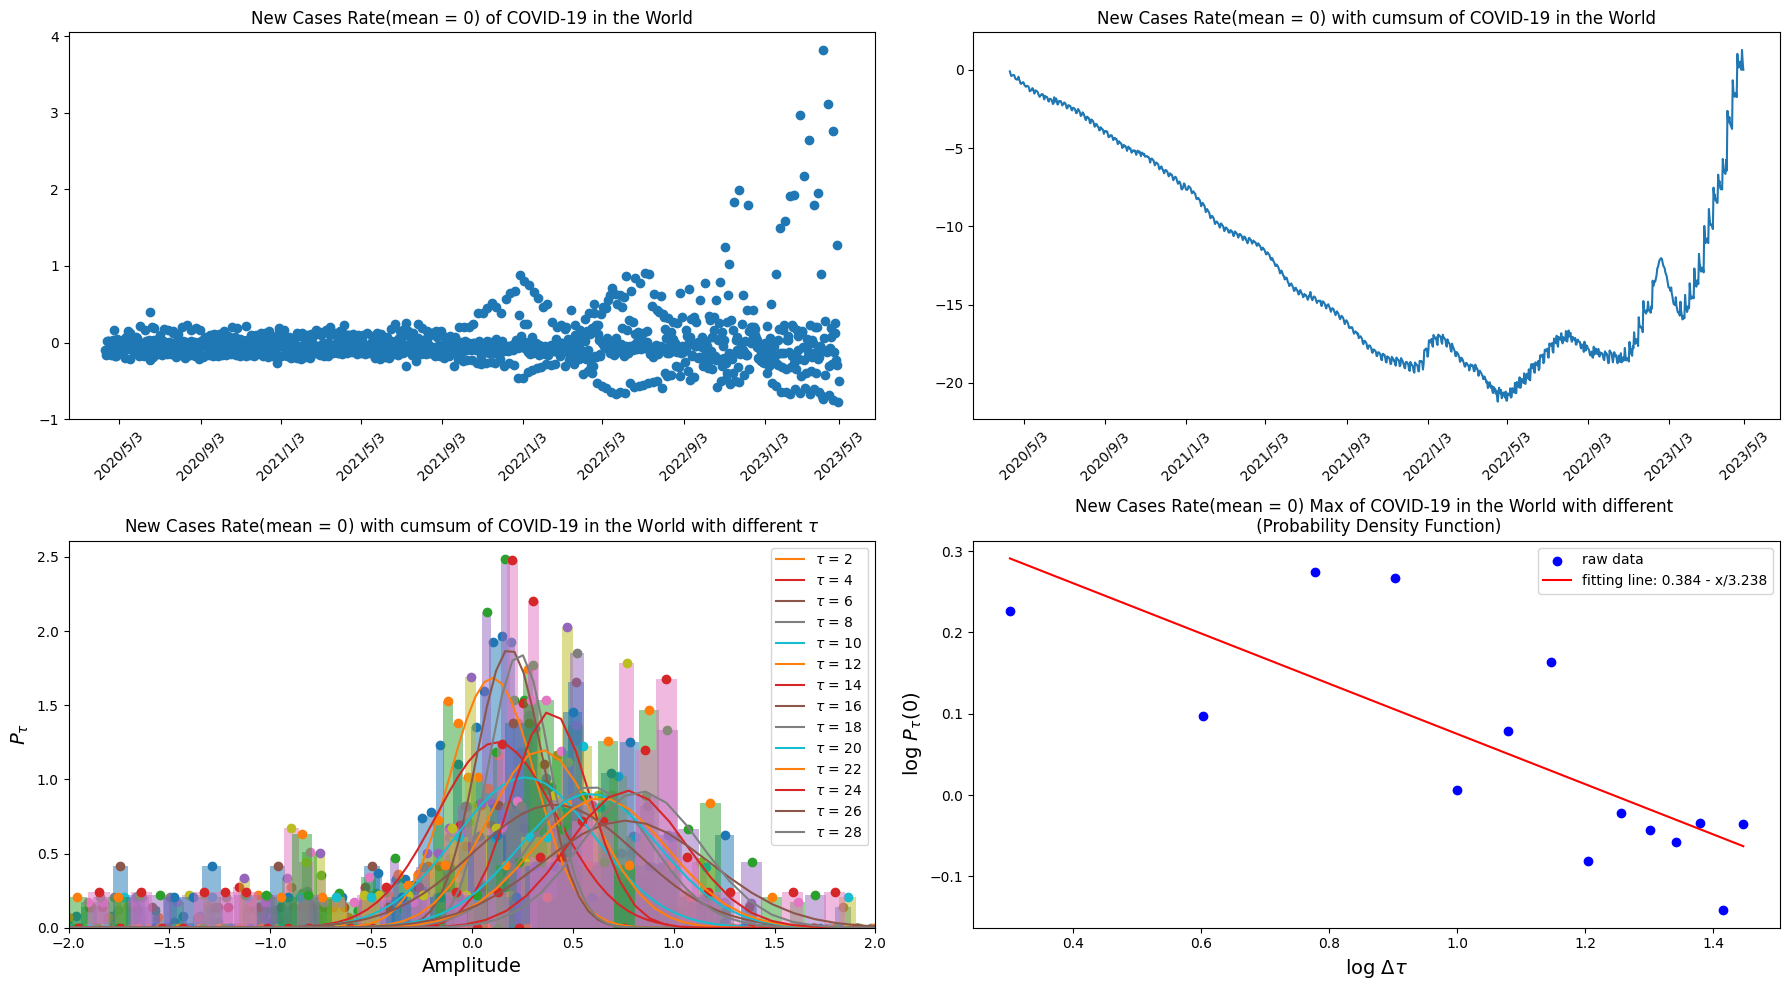

In [16]:
total_cases_rate_mean = np.array(total_cases_rate) - np.mean(total_cases_rate)

p_raw_data = np.cumsum(total_cases_rate_mean)
x = time[ start:(1210-1) ]

rang = ["2020/5/3", "2020/9/3",
        "2021/1/3", "2021/5/3", "2021/9/3",
        "2022/1/3", "2022/5/3", "2022/9/3",
        "2023/1/3", "2023/5/3"]

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate(mean = 0) of COVID-19 in the World")
plt.scatter(x, total_cases_rate_mean)
plt.xticks(rang, rotation = 45)

plt.subplot(222)
plt.title("New Cases Rate(mean = 0) with cumsum of COVID-19 in the World")
# plt.xlabel("t", fontsize = "14")
# plt.ylabel("Position", fontsize = "14")
plt.plot(x, p_raw_data)
plt.xticks(rang, rotation = 45)

#################################################################################

# 設定取樣頻率
# 設定變數
# size = [1, 2, 4, 8, 16, 32]
size = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

for j in size:
    locals()["data_" + str(j) + "_tr"] = []
    locals()["data_" + str(j)] = [] # 取樣後的震盪圖
    

    locals()["data_" + str(j) + "_tr"] = p_raw_data[0:len(p_raw_data):j] # 把原始資料累加的結果取樣

    locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][0] )

    # 把原始資料累加的結果取樣重新畫回震盪圖
    for i in range(len(locals()["data_" + str(j) + "_tr"])-1):
        locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][i] - locals()["data_" + str(j) + "_tr"][i+1])
        
####################################################################################################################################################

def g_function(x, A, sigma, mu):
    return A*(np.e**(-((x-mu)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# def g_function(x, A, sigma):
#     return A*(np.e**(-((x)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

plt.subplot(223)
test = []
Max = []

for j in size:
    
    locals()["data_" + str(j) + "_n"], locals()["data_" + str(j) + "_h_bins"], patches = plt.hist(
                                                                                    locals()["data_" + str(j)],  
                                                                                    density = True, 
                                                                                    alpha = 0.5,
                                                                                    bins = 100
                                                                                    )
    
    mid_bins = []
    for i in range( len(locals()["data_" + str(j) + "_h_bins"])-1 ):
        mid_bins.append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2 )

    plt.scatter( mid_bins, locals()["data_" + str(j) + "_n"] )

    locals()["data_" + str(j) + "_bins"] = []

    for i in range(0, len(locals()["data_" + str(j) + "_h_bins"])-1):
        locals()["data_" + str(j) + "_bins"].append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2)
    
    #plt.scatter(locals()["data_" + str(j) + "_bins"], locals()["data_" + str(j) + "_n"])

    x0 = locals()["data_" + str(j) + "_bins"]
    y0 = locals()["data_" + str(j) + "_n"]

    fitt=(50000/j, 1, 0)
    # fitt=(50000/j, 1)

    popt,pcov= curve_fit(g_function, x0, y0, p0=fitt)
    # print(popt, g_function(popt[2],*popt))
    plt.title(r"New Cases Rate(mean = 0) with cumsum of COVID-19 in the World with different $\tau$")
    plt.xlabel("Amplitude", fontsize = 14)
    plt.ylabel(r"$P_{\tau}$", fontsize = 14)
    plt.plot(x0, 
            g_function(x0,*popt), 
            label=r"$\tau$ = {}".format(j))
    plt.xlim(-2, 2)
    plt.legend(loc = "best")

    Max.append(np.log10(g_function(popt[2],*popt)))
    test.append(np.log10(j))

###########################################################################################################

x0 = test
y0 = Max

def function(x, c, a):
    return c - x/a
fitt=(-0.4, 3.3) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.subplot(224)
plt.title("New Cases Rate(mean = 0) Max of COVID-19 in the World with different \n (Probability Density Function)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel(r"log $\Delta$$\tau$", fontsize = 14)
plt.ylabel(r"log $P_{\tau}(0)$", fontsize = 14)
plt.legend(loc = 'upper right')
plt.tight_layout()
# plt.savefig("New Cases Rate of COVID-19 in the World (Probability Density Function).PNG")


### ~整理前~

In [ ]:
total_cases_rate_mean = np.array(total_cases_rate) - np.mean(total_cases_rate)

p_raw_data = np.cumsum(total_cases_rate_mean)
x = time[ start:(1210-1) ]

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]

plt.figure(figsize = (15, 12))
plt.subplot(221)
plt.title("New Cases Rate(mean = 0) of COVID-19 in the World")
plt.scatter(x, total_cases_rate_mean)
plt.xticks(rang, rotation = 45)

plt.subplot(222)
plt.title("New Cases Rate(mean = 0) with cumsum of COVID-19 in the World")
# plt.xlabel("t", fontsize = "14")
# plt.ylabel("Position", fontsize = "14")
plt.plot(x, p_raw_data)
plt.xticks(rang, rotation = 45)

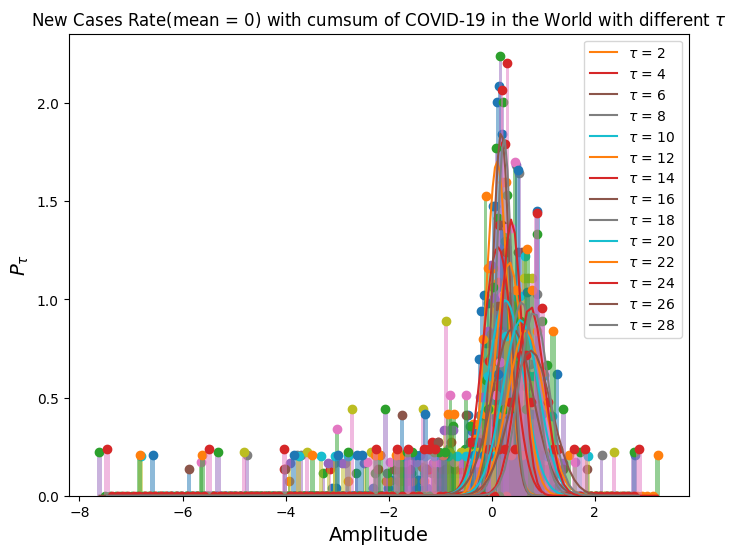

In [126]:
# 設定取樣頻率
# 設定變數
# size = [1, 2, 4, 8, 16, 32]
size = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

for j in size:
    locals()["data_" + str(j) + "_tr"] = []
    locals()["data_" + str(j)] = [] # 取樣後的震盪圖
    

    locals()["data_" + str(j) + "_tr"] = p_raw_data[0:len(p_raw_data):j] # 把原始資料累加的結果取樣

    locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][0] )

    # 把原始資料累加的結果取樣重新畫回震盪圖
    for i in range(len(locals()["data_" + str(j) + "_tr"])-1):
        locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][i] - locals()["data_" + str(j) + "_tr"][i+1])
        
####################################################################################################################################################

def g_function(x, A, sigma, mu):
    return A*(np.e**(-((x-mu)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# def g_function(x, A, sigma):
#     return A*(np.e**(-((x)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

fig1 = plt.figure(figsize = (8, 6))
test = []
Max = []

for j in size:
    
    locals()["data_" + str(j) + "_n"], locals()["data_" + str(j) + "_h_bins"], patches = plt.hist(
                                                                                    locals()["data_" + str(j)],  
                                                                                    density = True, 
                                                                                    alpha = 0.5,
                                                                                    bins = 100
                                                                                    )
    
    mid_bins = []
    for i in range( len(locals()["data_" + str(j) + "_h_bins"])-1 ):
        mid_bins.append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2 )

    plt.scatter( mid_bins, locals()["data_" + str(j) + "_n"] )

    locals()["data_" + str(j) + "_bins"] = []

    for i in range(0, len(locals()["data_" + str(j) + "_h_bins"])-1):
        locals()["data_" + str(j) + "_bins"].append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2)
    
    #plt.scatter(locals()["data_" + str(j) + "_bins"], locals()["data_" + str(j) + "_n"])

    x0 = locals()["data_" + str(j) + "_bins"]
    y0 = locals()["data_" + str(j) + "_n"]

    fitt=(50000/j, 1, 0)
    # fitt=(50000/j, 1)

    popt,pcov= curve_fit(g_function, x0, y0, p0=fitt)
    # print(popt, g_function(popt[2],*popt))
    plt.title(r"New Cases Rate(mean = 0) with cumsum of COVID-19 in the World with different $\tau$")
    plt.xlabel("Amplitude", fontsize = 14)
    plt.ylabel(r"$P_{\tau}$", fontsize = 14)
    plt.plot(x0, 
            g_function(x0,*popt), 
            label=r"$\tau$ = {}".format(j))
    plt.legend(loc = "best")

    Max.append(np.log10(g_function(popt[2],*popt)))
    test.append(np.log10(j))

[0.08087111 0.78013403]


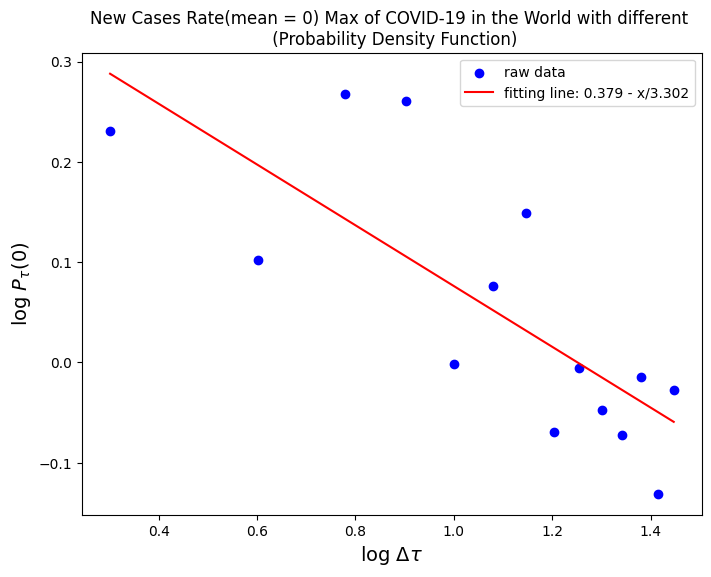

In [134]:
x0 = test
y0 = Max

def function(x, c, a):
    return c - x/a
fitt=(-0.4, 3.3) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
popt = np.round(popt, 3)
#print(pcov)
print(perr)
plt.figure(figsize=(8, 6))
plt.title("New Cases Rate(mean = 0) Max of COVID-19 in the World with different \n (Probability Density Function)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel(r"log $\Delta$$\tau$", fontsize = 14)
plt.ylabel(r"log $P_{\tau}(0)$", fontsize = 14)
plt.legend(loc = 'upper right')
plt.savefig("New Cases Rate of COVID-19 in the World (Probability Density Function).PNG")

## 單獨國家時間的新增人口

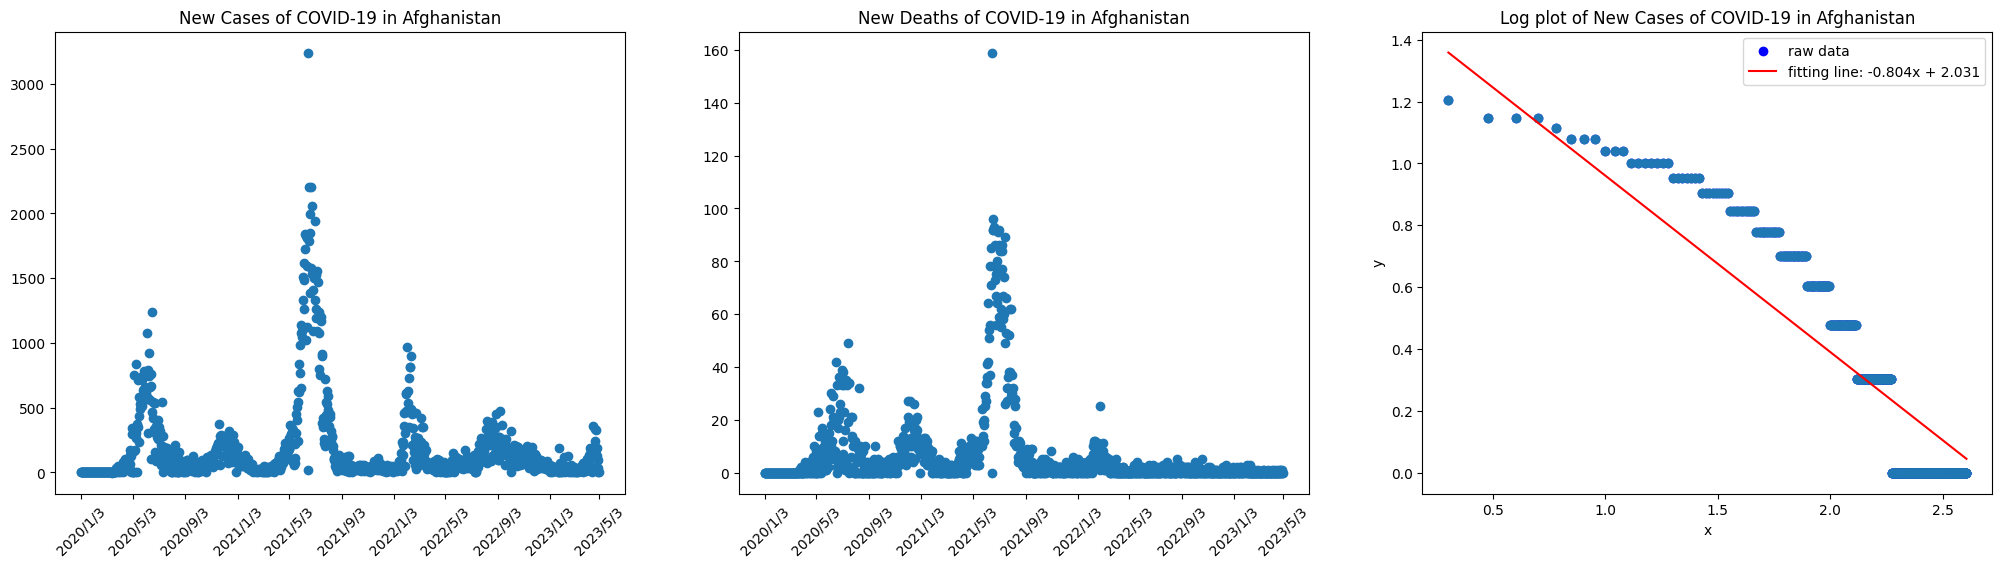

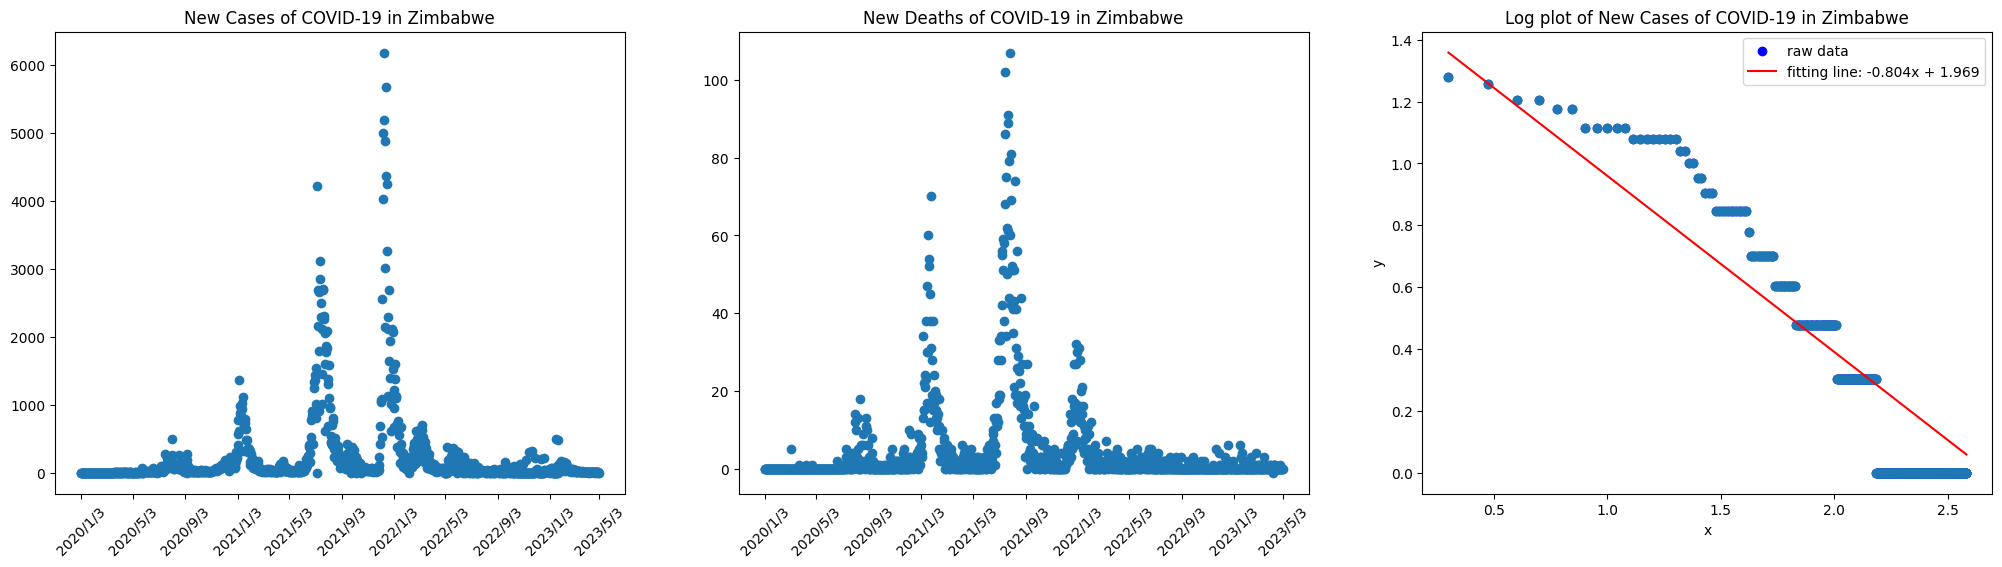

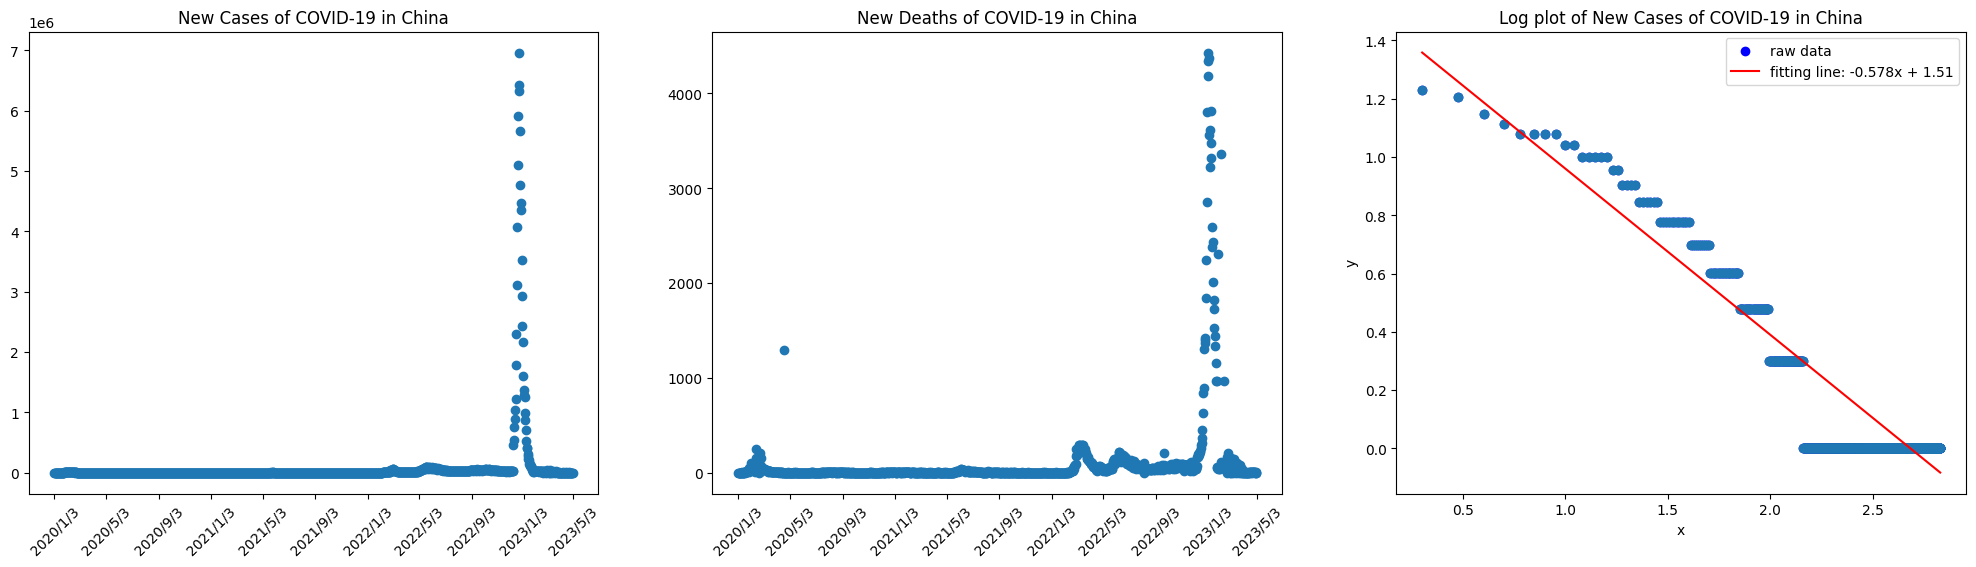

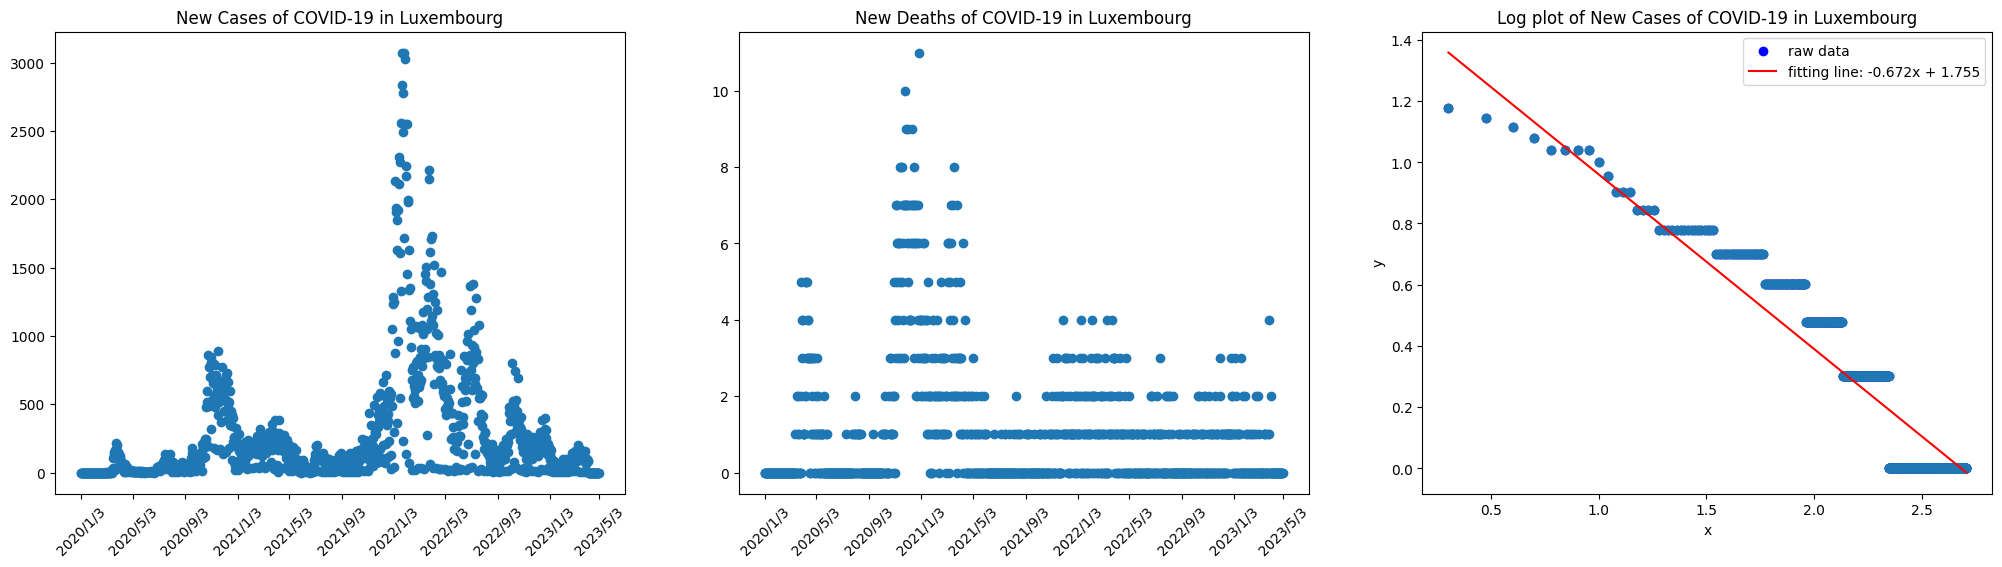

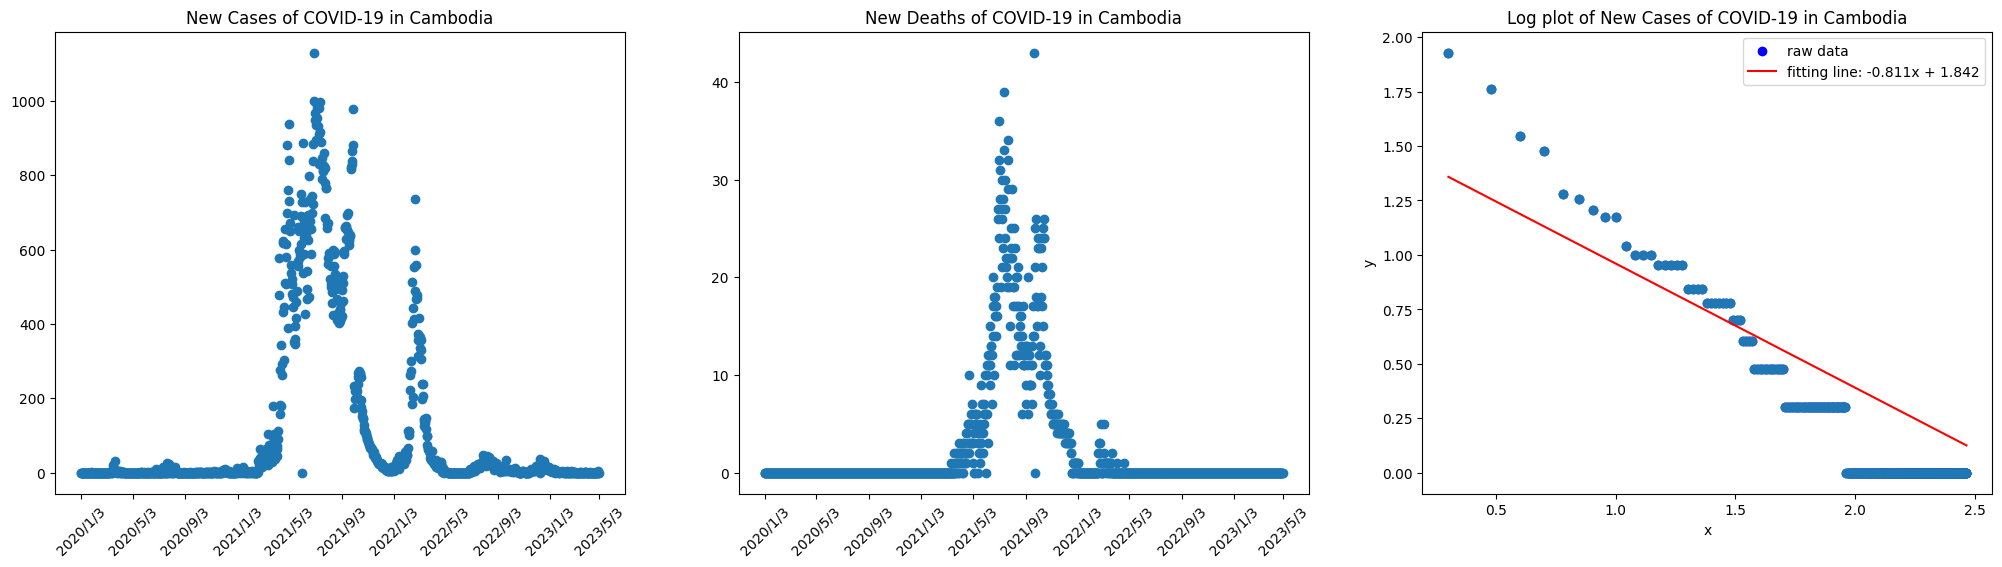

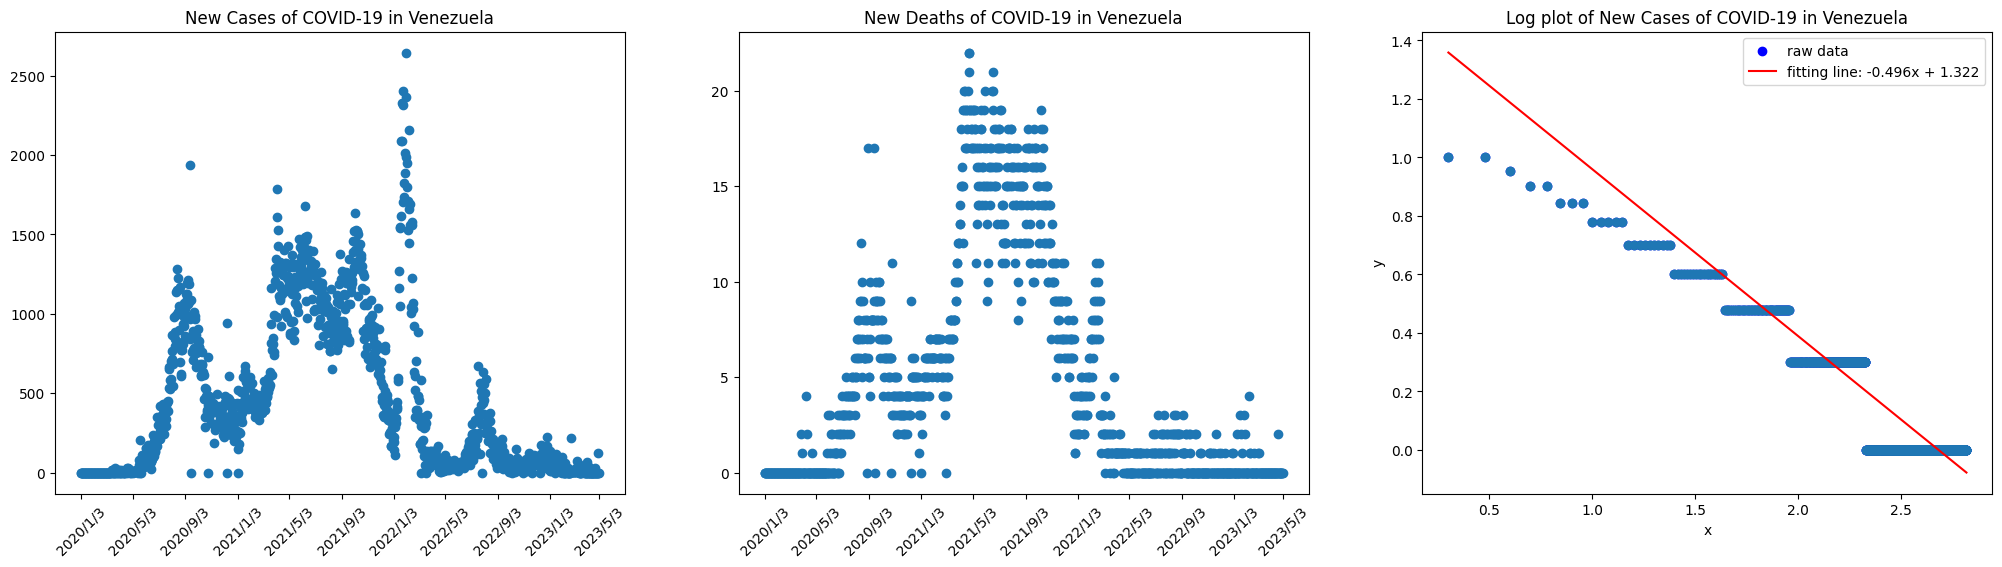

In [11]:
group1 = ["Afghanistan", "Zimbabwe", "China", "Luxembourg", "Cambodia", "Venezuela"]

for i in group1:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)

    ##########################################################################
    # FITTING

    x0 = log_x
    y0 = log_count

    def function(x,a,b):
        return a*x + b
    fitt=(-0.7, 2.5) # 猜 x = 1, y = 2*pi
    popt,pcov= curve_fit(function, x0, y0, p0=fitt)
    perr=np.sqrt(np.diag(pcov))
    popt = np.round(popt, 3)

    plt.title("Log plot of New Cases Rate of COVID-19 in the World (With Fitting)")
    plt.scatter(x0, y0, color="blue", label="raw data")
    plt.plot(x0, 
            function(np.array(x0), -0.57, 1.53),
            color="red", 
            label="fitting line: {}x + {}".format(*popt))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'upper right')

    ######################################################################
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()

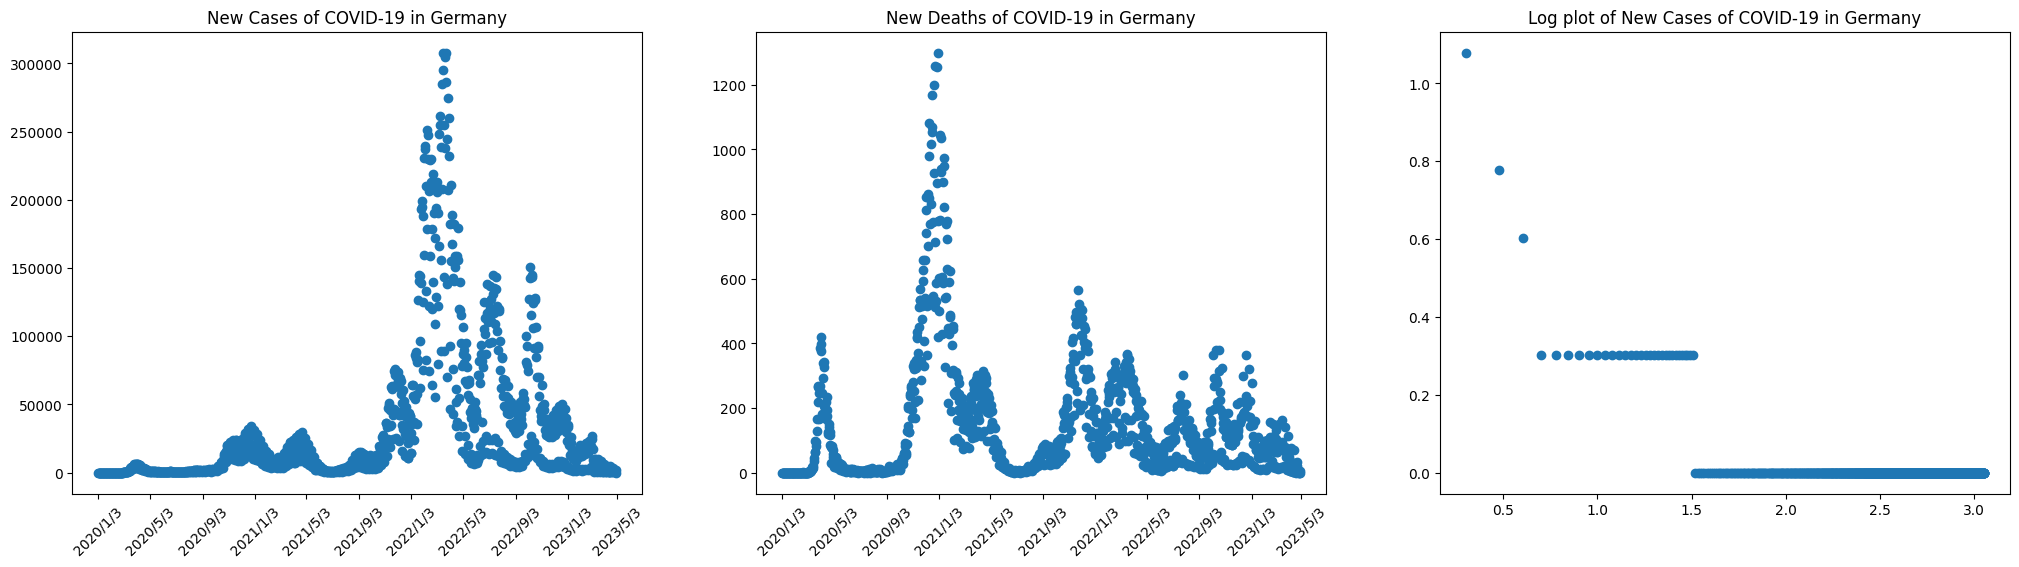

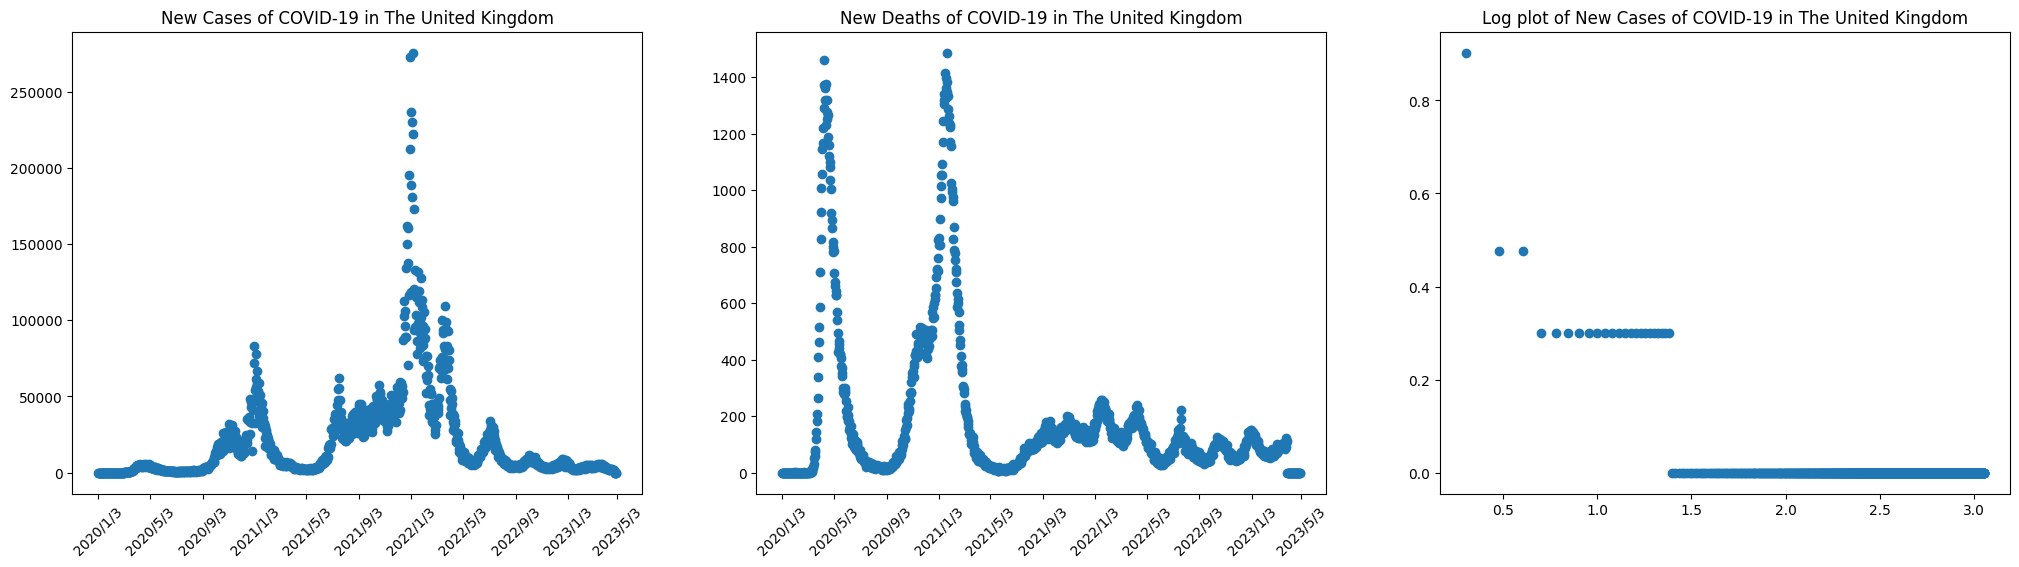

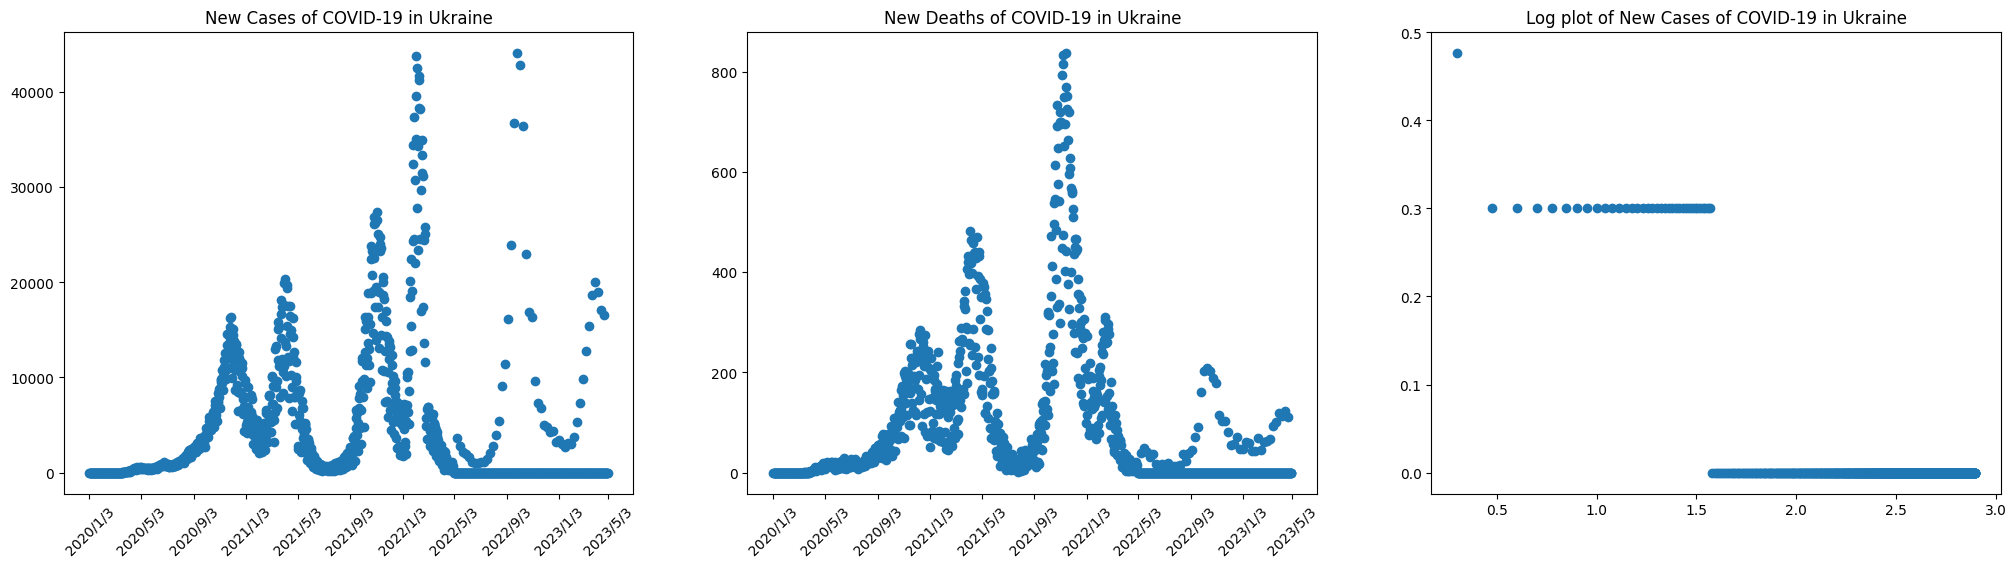

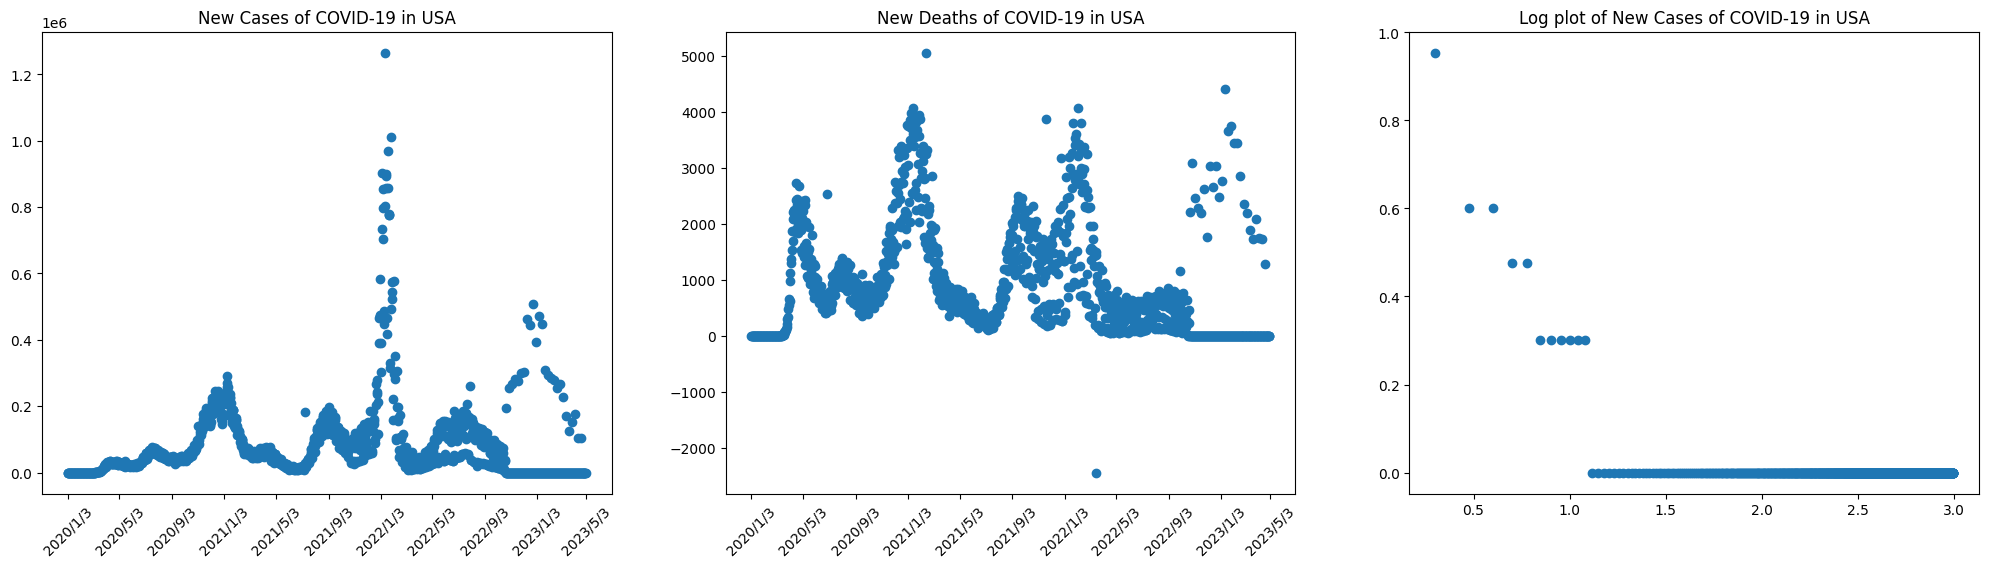

In [12]:
group2 = ["Germany", "The United Kingdom", "Ukraine", "USA"]

for i in group2:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()